### 1° Problema de Negócio

Precisamos análisar e fazer um pré-processamento nos dados disponibilizados, para que possamos melhorar o data frame e entregar para o engenheiro de machine learning criar uma maquina preditiva, a qual fará uma classificação dos vendedores de acordo com o crescimento na plataforma de vendas online da Olist

### 2º Importação de bibliotecas e conexão com o dataframe

In [56]:
# Importando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [57]:
# Visualizando as primeiras linhas
df = pd.read_excel('tb_projeto2.xlsx', index_col=0)
df.head(3)

,id_vendedor,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
0,"""9c4d31c7e46ab03a43fc06e3142afd4e""",7,2,0.29,1.00,4.00,2,2,1.00,1219,609.50,631.50,22.00,0.00,14,2
1,e3a386fc36e22064434e1fa256f6a9fa,205,14,0.07,1.14,4.25,16,17,1.06,791,49.44,65.19,15.75,0.18,18,2
2,"""0aa2205ca24f113f4658a5c536667426""",118,4,0.03,1.00,5.00,4,11,2.75,816,204.00,246.75,42.75,0.00,20,6


In [58]:
df.describe()

,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
count,2609.000000,2609.000000,2609.000000,2609.000000,2149.000000,2609.00000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000
mean,140.916443,19.440782,0.289203,1.106757,4.162545,28.79724,32.528172,1.159406,3897.182062,190.616286,217.763177,27.146976,0.090813,84.580682,5.259103
std,123.261138,35.824925,0.353035,0.269867,0.875801,88.35758,101.646895,0.396220,11587.294086,337.544792,350.177106,23.589212,0.173759,95.519365,120.425566
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.00000,1.000000,1.000000,7.000000,6.000000,16.000000,1.000000,0.000000,5.000000,-40.000000
25%,22.000000,2.000000,0.060000,1.000000,3.880000,2.00000,2.000000,1.000000,225.000000,61.000000,81.360000,16.200000,0.000000,16.000000,2.000000
50%,108.000000,6.000000,0.120000,1.000000,4.330000,7.00000,8.000000,1.000000,848.000000,108.800000,131.250000,20.500000,0.000000,35.000000,3.000000
75%,256.000000,19.000000,0.330000,1.120000,5.000000,21.00000,24.000000,1.140000,3135.000000,189.550000,220.000000,28.570000,0.110000,126.000000,4.000000
max,361.000000,334.000000,1.000000,4.370000,5.000000,1459.00000,1665.000000,6.000000,201620.000000,7966.670000,8099.330000,371.600000,1.000000,365.000000,6152.000000


### 3º Pré-processamento

        Valores Nulos

In [59]:
# Retorna true se existir valores faltantes.
df.isnull().values.any()

True

In [60]:
# Verifica o tipo dos dados e valores faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2609 entries, 0 to 2608
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_vendedor                   2609 non-null   object 
 1   dias_atividade                2609 non-null   int64  
 2   datas_distintas_de_venda      2609 non-null   int64  
 3   %_de_atividade                2609 non-null   float64
 4   vendas_por_dia_de_atividade   2609 non-null   float64
 5   avaliacao_media               2149 non-null   float64
 6   qtd_pedidos                   2609 non-null   int64  
 7   qtd_produtos                  2609 non-null   int64  
 8   media_produtos_por_pedido     2609 non-null   float64
 9   receita_total                 2609 non-null   int64  
 10  media_valor_pedido_sem_frete  2609 non-null   float64
 11  media_valor_pedido_com_frete  2609 non-null   float64
 12  media_valor_frete             2609 non-null   float64
 13  pro

In [61]:
# Verificando a quantidade e em quais atrinbutos existe valores nulos.
df.isnull().sum()

id_vendedor                       0
dias_atividade                    0
datas_distintas_de_venda          0
%_de_atividade                    0
vendas_por_dia_de_atividade       0
avaliacao_media                 460
qtd_pedidos                       0
qtd_produtos                      0
media_produtos_por_pedido         0
receita_total                     0
media_valor_pedido_sem_frete      0
media_valor_pedido_com_frete      0
media_valor_frete                 0
prop_pedidos_atrasados            0
dias_sem_vender                   0
tempo_de_postagem                 0
dtype: int64

In [62]:
# Retorna apenas os vendedores com valores nulos na coluna "avaliacao_media"
nulo = df[df.avaliacao_media.isnull()]
nulo.head()

,id_vendedor,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
9,"""13d95f0f6f73943d4ceffad0fc2cd32c""",1,1,1.00,1.0,NaN,1,1,1.0,250,250.0,309.00,59.00,1.00,173,4
12,"""2ec6e37d992a95eaddb3369dcbcc76d9""",1,1,1.00,1.0,NaN,1,1,1.0,80,80.0,97.00,17.00,0.00,331,4
19,"""0daf5180aa44356f60f8effa533b55a2""",24,2,0.08,1.0,NaN,2,2,1.0,145,72.5,92.00,19.50,0.50,12,1
20,"""51ed72984a04e5dd35c2b27e77179038""",165,5,0.03,1.4,NaN,7,7,1.0,1295,185.0,213.43,28.43,0.14,132,3
22,a4bd6e9adf39b63f43dc545d3ca1f53d,1,1,1.00,1.0,NaN,1,2,2.0,300,300.0,336.00,36.00,0.00,122,6


In [63]:
# Data Frame que retorna a quantidade de vendedores de acondo com a quantidade de vendas.
print(' Quantidade de pedidos vs quantidade de vendedores para vendedores que não tiveram avaliação')
PDxVD = pd.DataFrame(nulo.qtd_pedidos.value_counts()).rename(columns={'qtd_pedidos':'Vendedores'})
PDxVD.rename_axis('Pedidos', axis='columns', inplace=True)
PDxVD

 Quantidade de pedidos vs quantidade de vendedores para vendedores que não tiveram avaliação


Pedidos,Vendedores
1,263
2,107
3,49
4,21
5,10
6,5
7,4
8,1


Podemos verificar que existe uma quantide consideravel de vendedores que não receberam nenhuma avaliação, é importante que o vendedor seja avaliado para que outros compradores possam tomar decisões. Observamos que esses vendedores podem ser considerados pequenos ou iniciantes devido a baixa quantidade de vendas.
- Qual motivo levou o comprador a não avaliar pedido?
- As avaliações influenciam na retenção do vendedor para continuar a vender na plataforma?
- Como influenciar os compradores a avaliarem os pedidos?

        Tratando Valores Nulos

In [64]:
# Subistitui os valores nulo da coluna 'avaliacao_media' por 2.5
df.avaliacao_media.fillna(2.5, inplace=True)
df.head()

,id_vendedor,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
0,"""9c4d31c7e46ab03a43fc06e3142afd4e""",7,2,0.29,1.00,4.00,2,2,1.00,1219,609.50,631.50,22.00,0.00,14,2
1,e3a386fc36e22064434e1fa256f6a9fa,205,14,0.07,1.14,4.25,16,17,1.06,791,49.44,65.19,15.75,0.18,18,2
2,"""0aa2205ca24f113f4658a5c536667426""",118,4,0.03,1.00,5.00,4,11,2.75,816,204.00,246.75,42.75,0.00,20,6
3,"""640e21a7d01df7614a3b4923e990d40c""",162,73,0.45,1.58,3.98,115,136,1.18,7529,65.47,86.70,21.23,0.07,9,2
4,"""2156f2671501a81034d7d07f217609d0""",320,19,0.06,1.05,3.80,20,20,1.00,2861,143.05,161.75,18.70,0.15,38,3


In [65]:
# Retorna true se existir valores nulos.
df.isnull().values.any()

False

        Verificando  Outliers

Text(0.5, 0, 'Tempo de postagem (dias)')

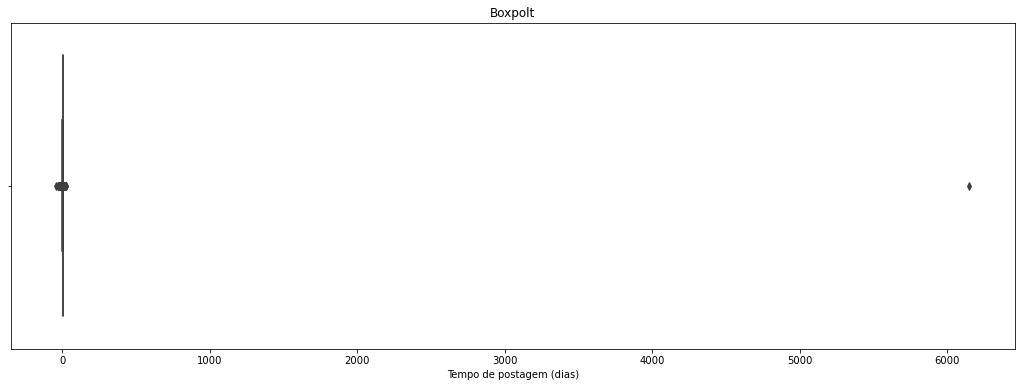

In [66]:
# Boxplot para verificar os outliers da coluna 'tempo_de_postagem
ax = sns.boxplot(df.tempo_de_postagem, orient='h')
ax.figure.set_size_inches(18, 6)
ax.set_title('Boxpolt')
ax.set_xlabel("Tempo de postagem (dias)")

In [67]:
# Retorna o vendedor com postagem maior que 30
df[df.tempo_de_postagem > 30]

,id_vendedor,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
2049,"""3f2af2670e104d1bcb54022274daeac5""",234,6,0.03,1.0,2.5,6,7,1.17,974,162.33,222.5,60.17,0.14,106,6152


In [68]:
df[df.tempo_de_postagem < 0]

,id_vendedor,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
55,"""9b522ba7eae9e1d04082f267144583cc""",133,2,0.02,1.00,2.50,2,3,1.50,1379,689.50,748.00,58.50,0.33,146,-28
63,"""30c7f28fd3a5897b2c82d152bb760c17""",73,5,0.07,1.00,2.00,5,5,1.00,1160,232.00,274.20,42.20,0.60,277,-2
79,c004e5ea15737026cecaee0447e00b75,1,1,1.00,1.00,2.50,1,1,1.00,2350,2350.00,2455.00,105.00,1.00,24,-18
92,"""04843805947f0fc584fc1969b6e50fe7""",1,1,1.00,1.00,2.50,1,2,2.00,1400,1400.00,1474.00,74.00,1.00,29,-5
97,"""4170f6a9367e6b5d6401d03ce6d54569""",58,4,0.07,1.00,3.00,4,5,1.25,569,142.25,165.50,23.25,0.20,257,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,"""700f03c207639c22d933381ff60b35c2""",21,3,0.14,1.00,1.00,3,3,1.00,810,270.00,303.67,33.67,0.67,278,-8
2564,"""160e4f13fd3a64b1b86807be88b5ffb0""",91,4,0.04,1.00,3.50,4,4,1.00,886,221.50,245.25,23.75,0.00,202,-1
2568,"""835f0f7810c76831d6c7d24c7a646d4d""",166,16,0.10,1.06,1.33,17,20,1.18,2040,120.00,143.06,23.06,0.50,200,-4
2583,c37b2059d4f90d4feead554e5246565e,245,12,0.05,1.00,4.43,12,16,1.33,840,70.00,88.33,18.33,0.44,60,-1


In [69]:
# Remove o vendedor de indice 2049 do dataframe
df.drop([0, 2049], inplace=True)

In [70]:
df.describe()

,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
count,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000
mean,140.932106,19.452628,0.289302,1.106839,3.869893,28.816264,32.549674,1.159463,3899.330648,190.466460,217.602658,27.136283,0.090829,84.599540,2.902570
std,123.267034,35.836072,0.353134,0.269954,1.016550,88.388790,101.682902,0.396359,11591.479265,337.574093,350.217638,23.589176,0.173814,95.545085,3.105417
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,6.000000,16.000000,1.000000,0.000000,5.000000,-40.000000
25%,22.000000,2.000000,0.060000,1.000000,3.000000,2.000000,2.000000,1.000000,225.000000,61.000000,81.360000,16.200000,0.000000,16.000000,2.000000
50%,108.000000,6.000000,0.120000,1.000000,4.090000,7.000000,8.000000,1.000000,844.000000,108.750000,131.080000,20.500000,0.000000,35.000000,3.000000
75%,256.000000,19.000000,0.330000,1.120000,4.735000,21.000000,24.000000,1.140000,3135.500000,189.335000,219.600000,28.550000,0.110000,126.500000,4.000000
max,361.000000,334.000000,1.000000,4.370000,5.000000,1459.000000,1665.000000,6.000000,201620.000000,7966.670000,8099.330000,371.600000,1.000000,365.000000,24.000000


Text(0.5, 0, 'Tempo de postagem (dias)')

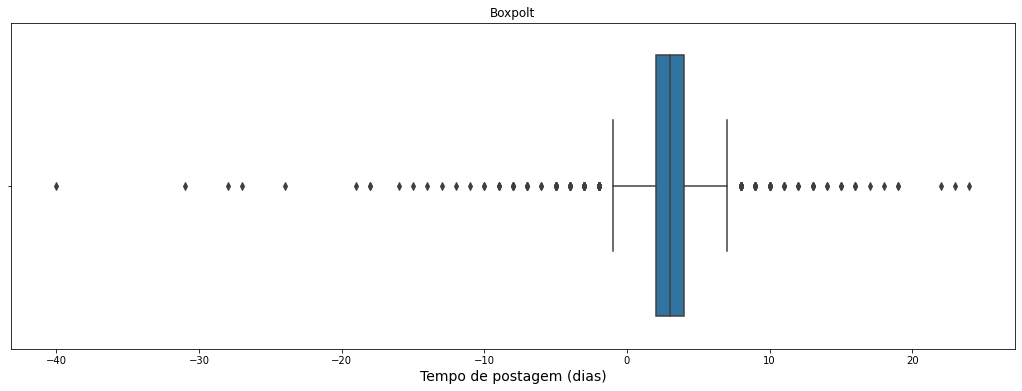

In [71]:
# Boxplot para verificar os outliers da coluna 'tempo_de_postagem
ax = sns.boxplot(df.tempo_de_postagem, orient='h')
ax.figure.set_size_inches(18, 6)
ax.set_title('Boxpolt')
ax.set_xlabel("Tempo de postagem (dias)", fontsize=14)

Um vendedor com tempo de postagem de 6152 dias foi removido do Data Frame devido ser um valor fora da realidade, outros 132 vendedores tem o tempo de postagem negativo chegando até -40.
- O que resultou em um tempo negativo? se, quando positivo pode significar atraso quando ultrapassado os 5 dias de limite disposto pela Olist.

Observamos que o tempo médio de postagem dos vendedores é de 2.9 dias

### 4º Análise Exploratória

In [72]:
df.shape

(2607, 16)

In [73]:
df.describe().round()

,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
count,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0,2607.0
mean,141.0,19.0,0.0,1.0,4.0,29.0,33.0,1.0,3899.0,190.0,218.0,27.0,0.0,85.0,3.0
std,123.0,36.0,0.0,0.0,1.0,88.0,102.0,0.0,11591.0,338.0,350.0,24.0,0.0,96.0,3.0
min,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,6.0,16.0,1.0,0.0,5.0,-40.0
25%,22.0,2.0,0.0,1.0,3.0,2.0,2.0,1.0,225.0,61.0,81.0,16.0,0.0,16.0,2.0
50%,108.0,6.0,0.0,1.0,4.0,7.0,8.0,1.0,844.0,109.0,131.0,20.0,0.0,35.0,3.0
75%,256.0,19.0,0.0,1.0,5.0,21.0,24.0,1.0,3136.0,189.0,220.0,29.0,0.0,126.0,4.0
max,361.0,334.0,1.0,4.0,5.0,1459.0,1665.0,6.0,201620.0,7967.0,8099.0,372.0,1.0,365.0,24.0


Text(0, 0.5, 'Quantidade de vendedores')

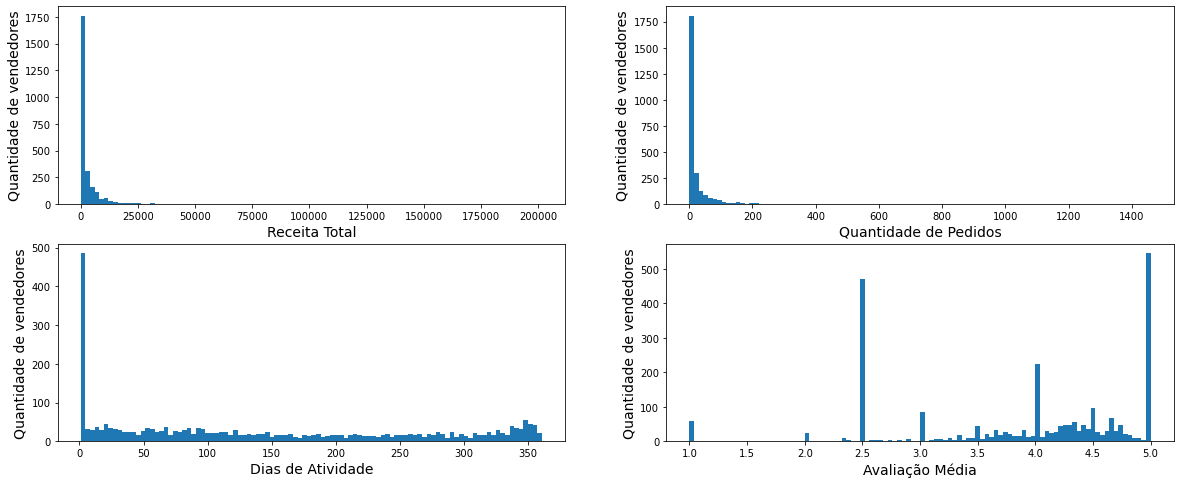

In [74]:
# Antera o tamanho do gráfico
area = plt.figure(figsize=(20,8))

# Adiciona a quantidade e a posição dos subplots
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

# Define o primeiro plot
g1.hist(df.receita_total, bins=100)
g1.set_xlabel('Receita Total', fontsize=14)
g1.set_ylabel('Quantidade de vendedores', fontsize=14)

# Define o segundo plot
g2.hist(df.qtd_pedidos, bins=100)
g2.set_xlabel('Quantidade de Pedidos', fontsize=14)
g2.set_ylabel('Quantidade de vendedores', fontsize=14)

# Define o terceiro plot
g3.hist(df.dias_atividade, bins=100)
g3.set_xlabel('Dias de Atividade', fontsize=14)
g3.set_ylabel('Quantidade de vendedores', fontsize=14)

# Define o quarto plot
g4.hist(df.avaliacao_media, bins=100)
g4.set_xlabel('Avaliação Média', fontsize=14)
g4.set_ylabel('Quantidade de vendedores', fontsize=14)

Os graficos nos mostram que a grande maioria dos vendedores são pequenos ou iniciantes:
- receita média de 4 mil
- média de 29 pedidos
- menos de 10 dias de atividades
- avaliação 5, resultado da baixa quantidade de avaliações.

    - Como estimular a permanencia dos pequenos vendedores na plataforma?
    - Vantagens de acordo com o crescimento na plataforma pode ajudar?

        Dias sem vender

In [75]:
df.head(2)

,id_vendedor,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
1,e3a386fc36e22064434e1fa256f6a9fa,205,14,0.07,1.14,4.25,16,17,1.06,791,49.44,65.19,15.75,0.18,18,2
2,"""0aa2205ca24f113f4658a5c536667426""",118,4,0.03,1.00,5.00,4,11,2.75,816,204.00,246.75,42.75,0.00,20,6


Text(0.5, 0, 'Dias sem Vender')

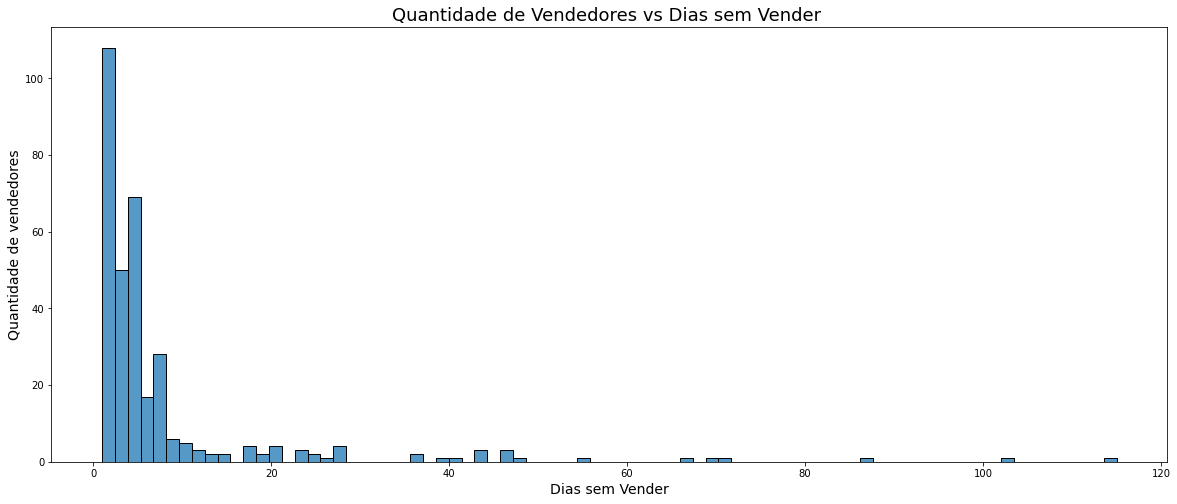

In [76]:
plt.figure(figsize=(20,8))

sns.histplot(df.dias_sem_vender.value_counts())

# Adicionando Titulo
plt.title('Quantidade de Vendedores vs Dias sem Vender ', fontsize=18)

# Renomeando eixo y
plt.ylabel('Quantidade de vendedores', fontsize=14)

# Renomeando eixo x
plt.xlabel('Dias sem Vender', fontsize=14)

In [77]:
# Quantidade de vendedores que tiveram 1 venda ou mais
df.id_vendedor.count()

2607

In [78]:
# Vendedores que tiveram mais de 90 dias sem atividade
maisque90 = df[df.dias_sem_vender > 90]
maisque90.dias_sem_vender.sort_values()

2595     91
953      91
1886     91
752      91
1369     91
       ... 
267     363
1531    363
554     363
2103    365
1706    365
Name: dias_sem_vender, Length: 830, dtype: int64

In [79]:
(830 / 2607) * 100

31.837360951285003

- Em um total de 2607 vendedores, 830 tiveram mais de 90 dias sem atividades na plataforma.
- Em porcentagem seria aproximadamente 32% dos vendedores que deixam de vender por mais de 90 dias.


In [80]:
maisque90.describe()

,dias_atividade,datas_distintas_de_venda,%_de_atividade,vendas_por_dia_de_atividade,avaliacao_media,qtd_pedidos,qtd_produtos,media_produtos_por_pedido,receita_total,media_valor_pedido_sem_frete,media_valor_pedido_com_frete,media_valor_frete,prop_pedidos_atrasados,dias_sem_vender,tempo_de_postagem
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,71.033735,6.359036,0.399867,1.045590,3.572181,7.442169,8.562651,1.183446,1168.977108,206.917771,234.491783,27.574169,0.117614,205.774699,2.631325
std,78.013384,11.381688,0.426926,0.139243,1.194121,16.481474,18.923764,0.480144,2626.251617,329.708886,344.556631,23.963225,0.233968,78.753305,4.424298
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,6.000000,16.000000,1.000000,0.000000,91.000000,-40.000000
25%,1.000000,1.000000,0.060000,1.000000,2.500000,1.000000,1.000000,1.000000,120.000000,57.500000,75.500000,15.670000,0.000000,132.000000,1.000000
50%,42.000000,3.000000,0.140000,1.000000,3.795000,3.000000,3.000000,1.000000,342.500000,109.000000,129.845000,20.000000,0.000000,198.000000,3.000000
75%,120.750000,6.000000,1.000000,1.000000,5.000000,7.000000,8.000000,1.110000,1156.500000,209.150000,247.292500,29.375000,0.140000,276.000000,4.750000
max,270.000000,128.000000,1.000000,2.380000,5.000000,206.000000,225.000000,6.000000,33230.000000,3133.330000,3297.000000,253.000000,1.000000,365.000000,22.000000


Text(0, 0.5, 'Quantidade de vendedores')

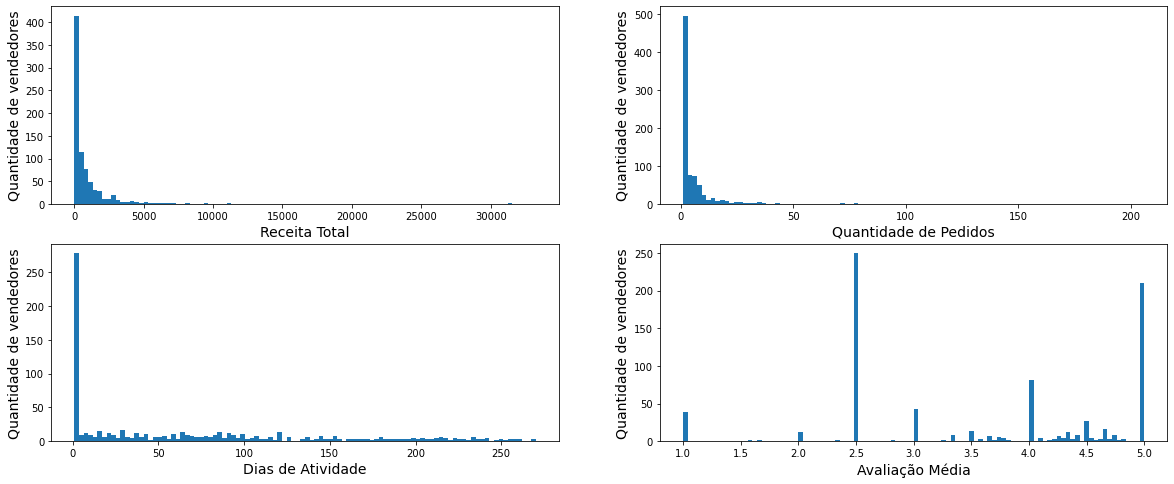

In [81]:
# Antera o tamanho do gráfico
area = plt.figure(figsize=(20,8))

# Adiciona a quantidade e a posição dos subplots
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

# Define o primeiro plot
g1.hist(maisque90.receita_total, bins=100)
g1.set_xlabel('Receita Total', fontsize=14)
g1.set_ylabel('Quantidade de vendedores', fontsize=14)

# Define o segundo plot
g2.hist(maisque90.qtd_pedidos, bins=100)
g2.set_xlabel('Quantidade de Pedidos', fontsize=14)
g2.set_ylabel('Quantidade de vendedores', fontsize=14)

# Define o terceiro plot
g3.hist(maisque90.dias_atividade, bins=100)
g3.set_xlabel('Dias de Atividade', fontsize=14)
g3.set_ylabel('Quantidade de vendedores', fontsize=14)

# Define o quarto plot
g4.hist(maisque90.avaliacao_media, bins=100)
g4.set_xlabel('Avaliação Média', fontsize=14)
g4.set_ylabel('Quantidade de vendedores', fontsize=14)

- Os vendedores que estão a mais de 90 dias sem vendas tem uma média de 70 dias de atividade.
- O terceiro quartil nos mostra que a grande maioria desses vendedores tem até 7 vendas durante seus dias de atividade.

        Analisando a saúde das vendas

In [82]:
# importando os data frames
df2 = pd.read_csv('olist_orders_dataset.csv')
df3 = pd.read_csv('olist_order_payments_dataset.csv')

# Removendo as colunas não necessárias
df2.drop(columns=['order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date',
                  'customer_id', 'order_purchase_timestamp'], inplace=True)
df3.drop(columns=['payment_sequential', 'payment_type', 'payment_installments'], inplace=True)

# Inner merge dos data frames por order_id
dataOrders = pd.merge(df2, df3, on='order_id', how='inner')

# Remove as horas do date type
dataOrders['order_approved_at'] = pd.to_datetime(dataOrders['order_approved_at']).dt.normalize()

# Agrupando o Data Frame por dia
dataOrders = dataOrders.groupby(by='order_approved_at').sum()

# Reset Index
dataOrders.reset_index(inplace=True)

dataOrders.head(10)

,order_approved_at,payment_value
0,2016-10-04,2877.21
1,2016-10-05,2356.44
2,2016-10-06,20145.72
3,2016-10-07,12185.05
4,2016-10-08,6324.35
5,2016-10-09,1933.37
6,2016-10-10,7839.94
7,2016-10-11,3145.60
8,2016-10-12,465.26
9,2016-10-13,661.72


In [83]:
dataOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_approved_at  610 non-null    datetime64[ns]
 1   payment_value      610 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.7 KB


In [84]:
# Adiciona as colunas de medias móveis
dataOrders['MovingMean14'] = dataOrders.payment_value.rolling(14).mean()
dataOrders['MovingMean30'] = dataOrders.payment_value.rolling(30).mean()

<AxesSubplot:title={'center':'Análise Temporal - Vendas na plataforma Olist de 10/2016 a 10/2018'}, xlabel='Tempo', ylabel='Vendas (R$)'>

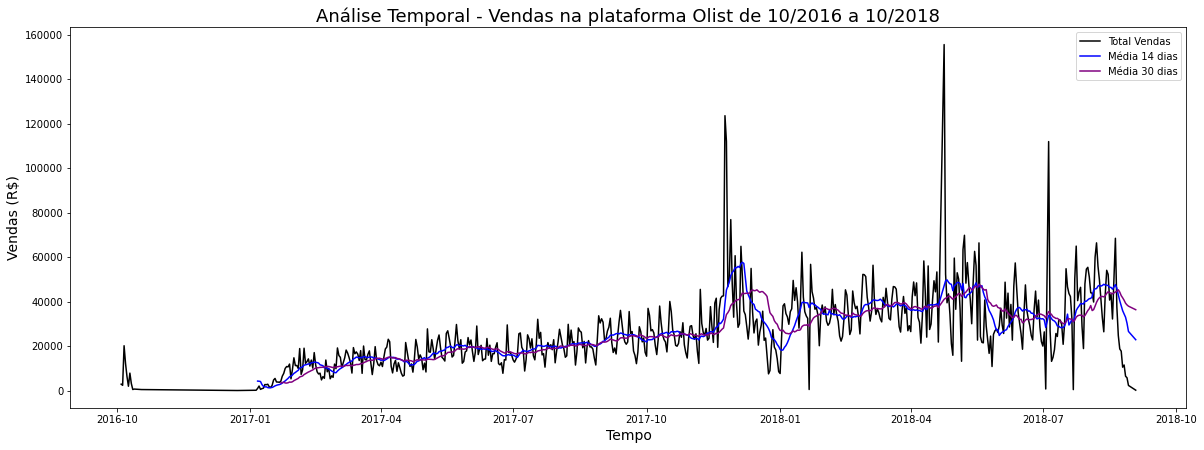

In [85]:
# Altera o tamanho do gráfico
plt.figure(figsize=(20,7))

# Adicionando Titulo
plt.title('Análise Temporal - Vendas na plataforma Olist de 10/2016 a 10/2018', fontsize=18)

# Renomeando eixo y
plt.ylabel('Vendas (R$)', fontsize=14)

# Renomeando eixo x
plt.xlabel('Tempo', fontsize=14)

# Linha do gráfico total vendas
sns.lineplot(x = 'order_approved_at', y = 'payment_value',label='Total Vendas', ci=None, color='black', data = dataOrders)

# Linha do gráfico média 14 dias
sns.lineplot(x = 'order_approved_at', y = 'MovingMean14', label='Média 14 dias', ci=None, color='blue', data = dataOrders)

# Linha do gráfico média 180 dias
sns.lineplot(x = 'order_approved_at', y = 'MovingMean30', label='Média 30 dias', ci=None, color='purple', data = dataOrders)

- Podemos ver que nos primeiros 3 meses da análise temporal a quantidade receita não foi das melhores, talvez tenha sido um beta teste,
    logo no inicio de 2017 o gráfico inicia com uma leve tendencia de alta, por volta do mês 12/2017 houve um grande bump de aproximadamente
    200% em relação a média, o motivo pode sem em razão às compras de fim de ano. Início de 2018 a média se manteve em aproximadamente 30mil
    até um segundo grande aumento no final do mês 04/2018 e início do mês 05/2018, chegando a quase bater 160mil em vendas.

In [86]:
# movimentação em vendas somada Olist entre de 10/2016 a 10/2018
print(dataOrders.payment_value.sum())

15971742.35


- A plataforma Olist obteve uma movimentação total de aproximadamente 16 milhões de reais entre de 10/2016 a 10/2018

In [87]:
# Quantidade de vendedores que tiveram 1 venda ou mais na plataforma
print(df.id_vendedor.count())

2607


- A plataforma Olist obteve um total de 2607 vendedores que venderam 1 ou mais produtos entre de 10/2016 a 10/2018

In [88]:
# Impota a tabela de vendedores cadastrados
vendedores = pd.read_csv('olist_sellers_dataset.csv', encoding='utf-8')
vendedores.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [89]:
# Total de vendedores cadastrados
print(vendedores.seller_id.count())

3095


- A plataforma Olist obteve 3095 cadastros de vendedores entre de 10/2016 a 10/2018

        Quantidade de vendedores por estado

In [90]:
# Series da quantidade de vendedores em cada cidade
vendedores = pd.DataFrame(vendedores.groupby('seller_state').seller_id.count())

# Organiza do maior para o menor
vendedores.sort_values(by='seller_id', ascending=False, inplace=True)

# Adiciona o index
vendedores.reset_index(inplace=True)
vendedores.head(3)

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244


Text(0.5, 0, 'Estados')

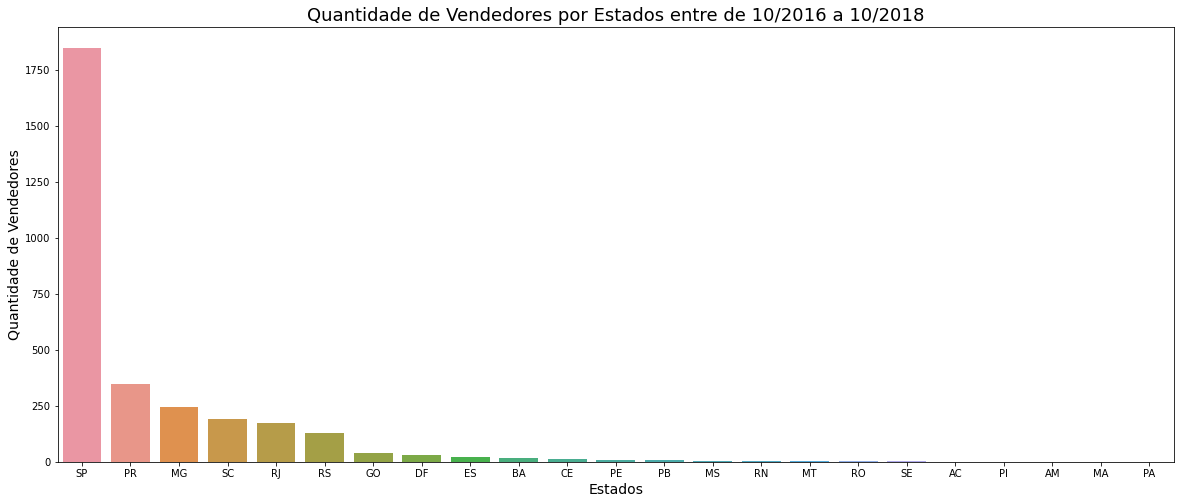

In [91]:
# Alterando tamanho do gráfico
plt.figure(figsize=(20,8))

sns.barplot(x = 'seller_state', y = 'seller_id', data = vendedores)

# Adicionando Titulo
plt.title('Quantidade de Vendedores por Estados entre de 10/2016 a 10/2018', fontsize=18)

# Renomeando eixo y
plt.ylabel('Quantidade de Vendedores', fontsize=14)

# Renomeando eixo x
plt.xlabel('Estados', fontsize=14)

- Os vendedores da Olist em sua grande parte se concentram no estado de São Paulo contando com 1849 vendedores, com aproximadamente 6x mais vendedores que o segundo colocado que é o estado do Paraná, com 349 vendedores.

        Quantidade de compradores por estado

In [92]:
compradores = pd.read_csv('olist_customers_dataset.csv')
# Series da quantidade de vendedores em cada cidade
compradores = pd.DataFrame(compradores.groupby('customer_state').customer_id.count())

# Organiza do maior para o menor
compradores.sort_values(by='customer_id', ascending=False, inplace=True)

# Adiciona o index
compradores.reset_index(inplace=True)
compradores.head(3)

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635


In [93]:
# Quantidade de clientes
compradores.customer_id.sum()

99441

- A plataforma Olist obteve 99441 cadastros de clientes compradores entre de 10/2016 a 10/2018

Text(0.5, 0, 'Estados')

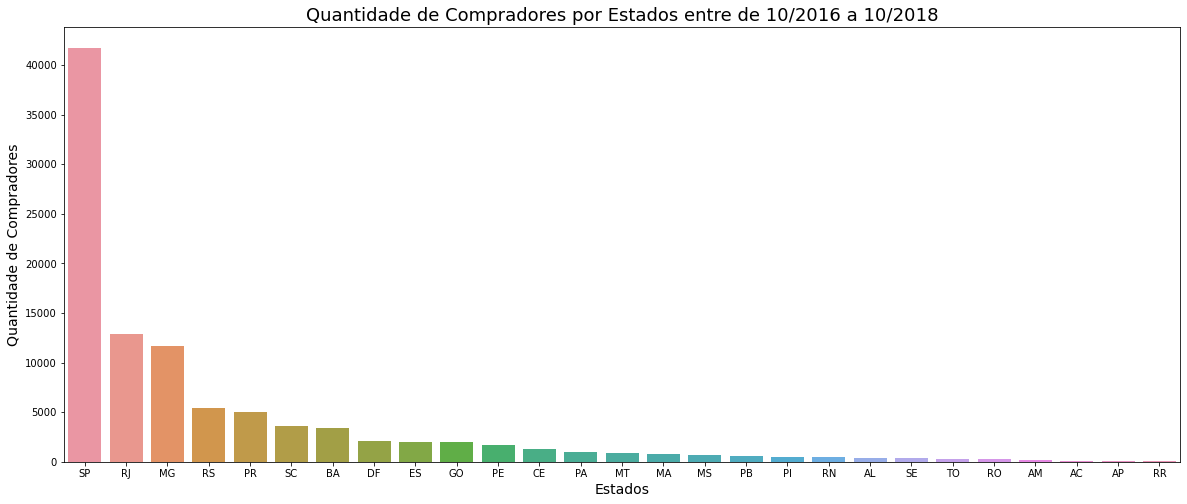

In [94]:
# Alterando tamanho do gráfico
plt.figure(figsize=(20,8))

sns.barplot(x = 'customer_state', y = 'customer_id', data = compradores)

# Adicionando Titulo
plt.title('Quantidade de Compradores por Estados entre de 10/2016 a 10/2018', fontsize=18)

# Renomeando eixo y
plt.ylabel('Quantidade de Compradores', fontsize=14)

# Renomeando eixo x
plt.xlabel('Estados', fontsize=14)

- A Plataforma Olist teve uma movimentação de 41746 compradores entre de 10/2016 a 10/2018, aproximadamente 3 vezes a mais do que o Rio de Janeiro com 12852, que é o 5° colocado em número de vendedores porém está em 2° colocado em número de compradores.

### 5° Exportando o Data Frame

In [95]:
df.to_csv('tb_projeto_pro.csv')